## 1. IMPORTS

In [ ]:
# importing dataset from googledrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
# importing important and additional library packakge

# data handling
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# machine learning
from sklearn.model_selection import train_test_split , cross_val_score

# to process the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer , KNNImputer

# hyperparameter tuning
!pip install optuna
import optuna

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor

from sklearn.model_selection import GridSearchCV

# model
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,VotingRegressor, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle

# metrics
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , r2_score, mean_squared_error , mean_absolute_error, precision_score, recall_score, f1_score


In [231]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/heart_disease_dataset.csv")

# 2. DISCOVERING THE DATA

## About the Dataset & Initial Analysis

This dataset consist of 14 attributes in regarding patiences demographic and information related to their cardiac profile. We assumed that the main task is to predict based on those features whether the patience has heart disease or not and num attribute as determining factor.


**Features Description of Dataset**
1. id :
represents unique id for patients in the data set

1. age :
represents as age of patient in years

1. sex :
represent as gender of patient (male/female)

1. dataset (origin):
information about location of the study taken place.

2. cp (chest pain):
describes types of chestpain that patient suffer with.

1. trestbps:
represents resting blood pressure that measured in mm/Hg

1. chol:
represents number of serum cholesterol, measured in mg/dl

1. fbs (fasting blood sugar):
represents fasting blood sugar, measured in mg/dl.

1. restecg:
describes patients' ellectrocardiographics result.

1. thalch (max heart rate):
represents maximum heart rate achieved

1. exang:
indicates whether patients are having excercise-induce angina (chest pain that occurs during physical activity) or not

1. oldpeak (ST depression induced by exercise):
represents value of electrocardiogram (ECG) testing after excercise test.

1. slope:
the slope of the peak exercise ST segment.

1. ca (number of major vessels):
number of major vessels colored by fluoroscopy, may indicate severity of coronary artery disease.

1. thal:
describes thalasemia diagnosis.

1. num (predicted attribute):
represents the predicted value of certain heart diseases condition.


**Summary of Statisitcal Analysis:**

**1. Features :**



*   **Age:**
average value for age in this dataset is approximately 53.5 with standard deviation of 9.42


*   **Sex:**
there is imbalance samples between male (79%) to female (21%) ratio.

*   **dataset (origin):**
this study taken place of 4 areas, as cleveland (33%) of US states and hungary (31.8%) of Europe as majority of place of study.

*   **cp (chest pain):**
the majority type of chestpain is asymptomatic which mostly appear 496 (53,8%) times out of other three of chest pains.

*   **trestbps:**
the mean of resting of blood pressure of patients is 132.1 with standard deviation of 19.0


*   **chol:**
the mean of cholesterol level in this data is 199 mg/dl which considered really high in cholesterol.

*   **fbs (fasting blood sugar):**
majority of patients in this data is having lower fasting blood sugar than 120mg/dl (75.2%). this might be intersting number cause it might be aligned/correlated the high numbers of diabetic samples in the data.

*   **restecg:**
majority of patients in this dataset is having normal ellectrocardiographics test results (60%).

*   **thalch (max heart rate):**
maximum of heartrate in this data as high as 202bpm and mean heart rate of 137.5 and minimum heart rate of 60.

*   **exang:**
  42.6% of patients experience chest discomfort during physical excerise due to to poor blood flow through the heart's coronary arteries. this might caused by cholesterol clogged the arteries.


*   **oldpeak (ST depression induced by exercise):**
the mean of ST depression value is 0.87 mm is less than 1mm is considered as normal. with standard deviation of 1.

*   **slope:**
this column is moderately dominated by nan value of 309 samples. flat slope took greater part of patients' slope of peak ST depresision test (56.5%) followed by upsloping (33.2%) and downsloping (10.3%)

*   **ca (number of major vessels):**
this column is highly dominated by nan value, when taking the data it is might be uneconomical to do such test of diagnosing major vessels. mean of ca value is 0.67 with standard deviation of 0.93.

*   **thal:**
this column is dominated by nan values (52,8%) and followed by normal (21,3%) and reversible defect (20,8%) and only 5% of fixed defect.


*   **num (predicted attribute):**
44% of patients in this dataset are not having heart diseases, but 56% percents of them are diagnosed with heart disease that varies in 3 class of severity level.

**2. Findings :**



*   **noticeable amount of missing values:** Significant numbers of 257 rows (27% from total data) describing null value in 3 the features alltogether which are *slope, ca & thal*. we afraid that imputing these features will introduced a biased result on machine learning model.

*   **Impossible value of 0 in cholesterol level:** we found that there are good amount of 0 value (19.3%) on cholesterol level. we might have to replace this 0 value to nan, so imputers will find the appropriate value.


**3. Information of the dataset :**

* we drop **id** column in order to simplify the dataset. The **sex, dataset, cp, fbs, restecg, exang, slope** and **thal** data type is **object**. then **age** and **num/severity** data types are categorized as **int64**. The rest of the data are labeled as **float64**.





In [232]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [234]:
#show missing value in dataset

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [235]:
# change name column name for more readability
df.rename(columns={'dataset': 'origin'}, inplace=True)
df.rename(columns={'num': 'severity'}, inplace=True)

# drop id column where it is not needed
df.drop('id', axis=1, inplace=True)
df.head()

df

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [236]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,severity
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [237]:
df.select_dtypes(include=['object']).describe()

,sex,origin,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [238]:
# prompt: convert fbs column boolean value to 0 and 1 in order to make histogram visualization
df_v = df.copy()

df_v['fbs'] = df_v['fbs'].astype(bool)
df_v['fbs'] = df_v['fbs'].astype(int)

df_v['exang'] = df_v['exang'].astype(bool)
df_v['exang'] = df_v['exang'].astype(int)

df_v['thal'] = df_v['thal'].astype(str)


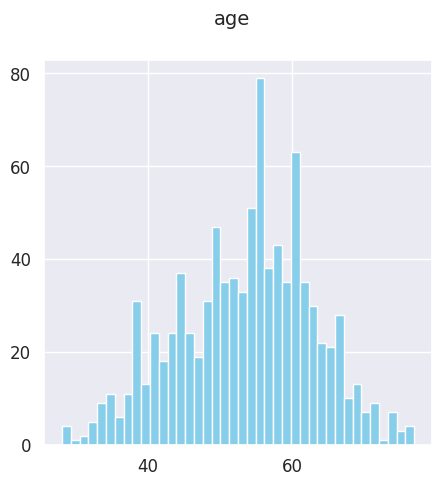

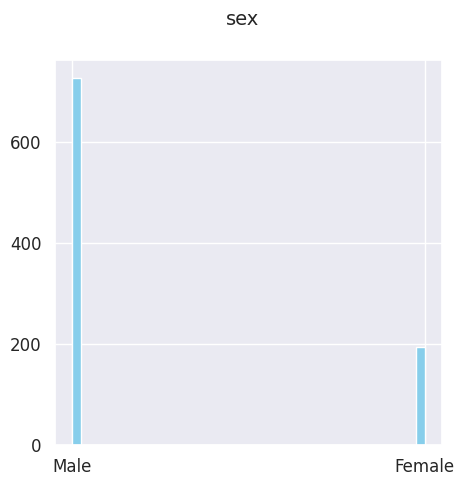

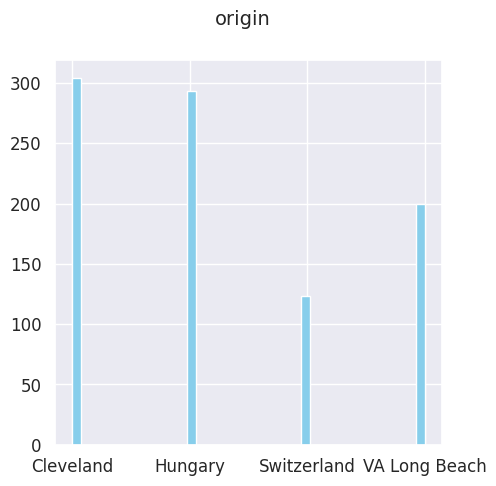

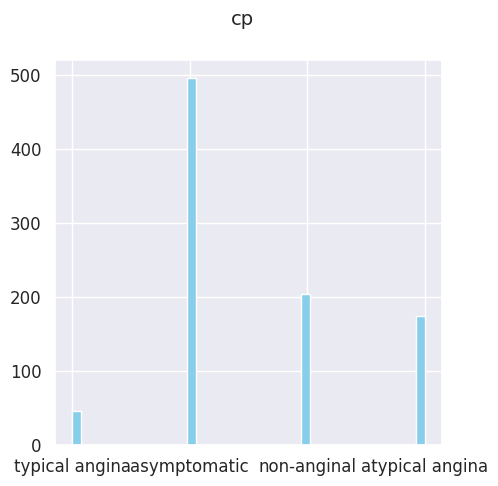

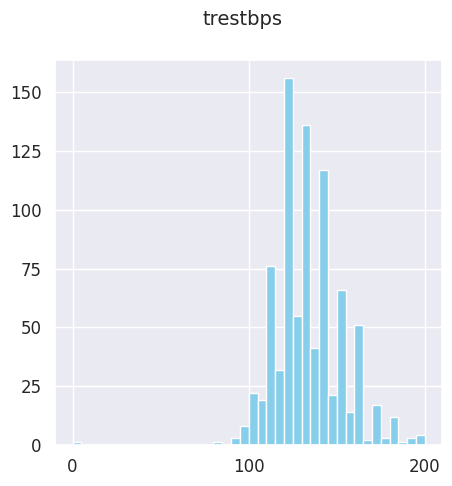

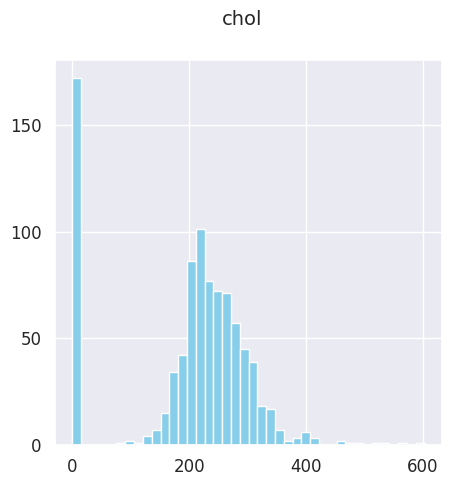

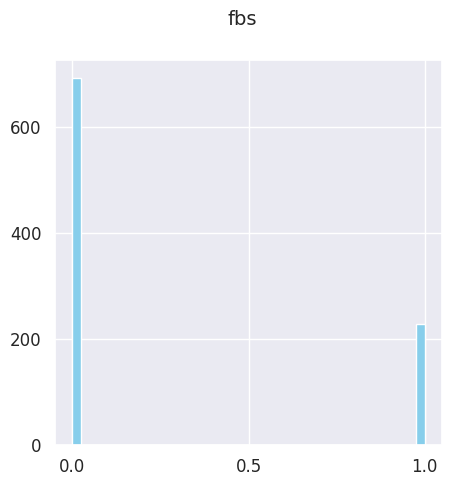

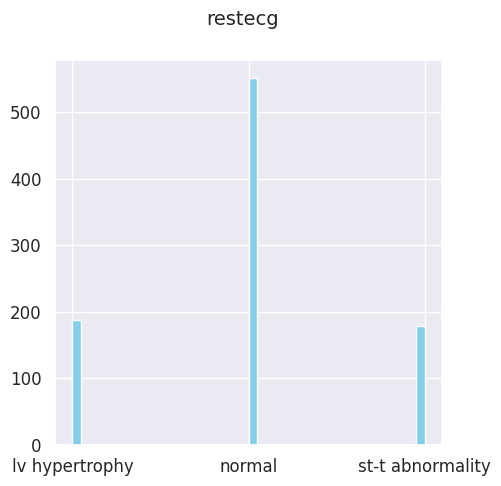

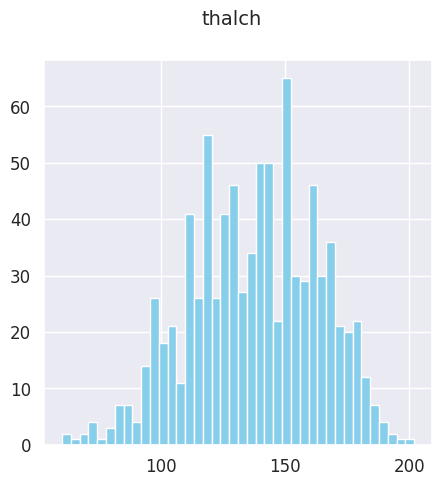

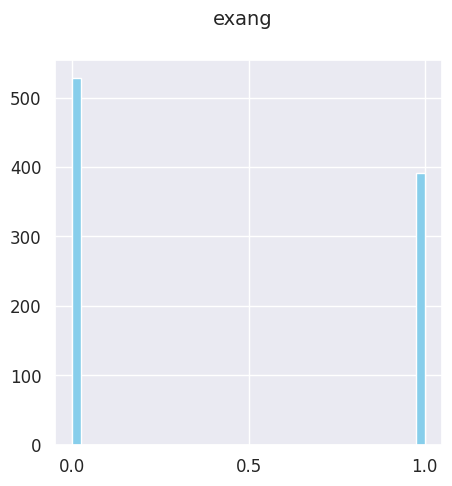

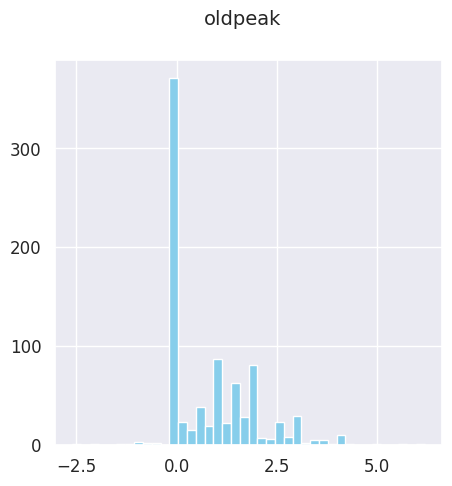

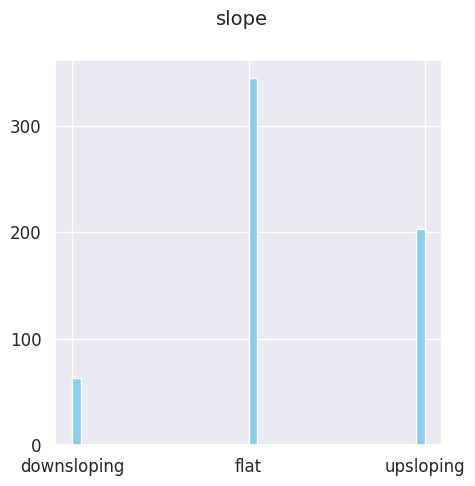

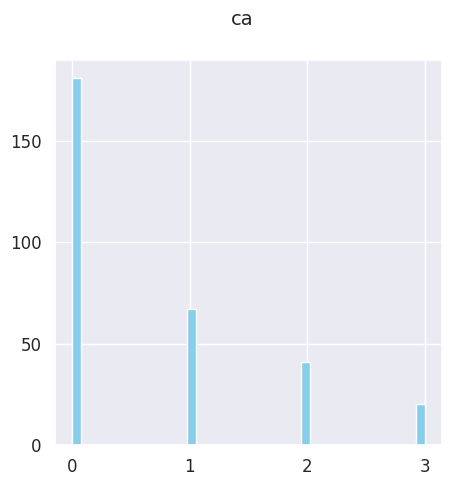

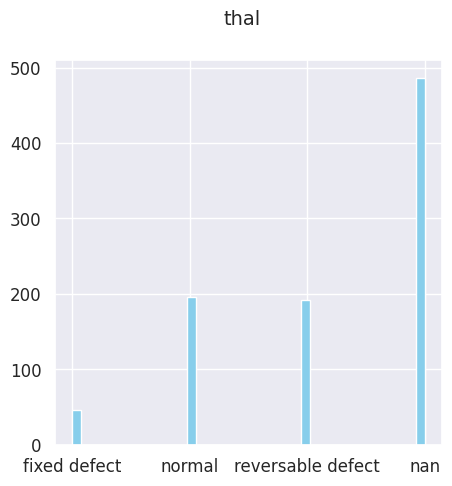

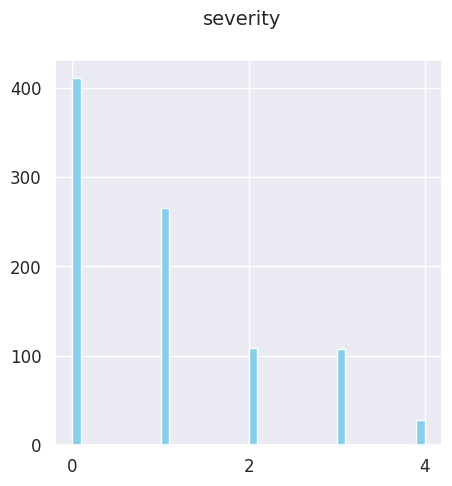

In [239]:
# presenting all features in dataset in form of histogram
for i in df_v:
    df_v[i].hist(bins=40, figsize=(5,5), color='skyblue')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.suptitle(i, fontsize=14)
    plt.show()

In [241]:
severity_counts = df_v['severity'].value_counts()

fig = px.pie(values=severity_counts.values, names=severity_counts.index,
             title='Distribution of heart diseases severity', color_discrete_sequence=px.colors.sequential.OrRd, hole=0.5)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    legend_title_text='severity',
    xaxis_title='Outcome',
    title={
        'text': "Percentage Distribution of heart diseases severity",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=24)})

fig.show()

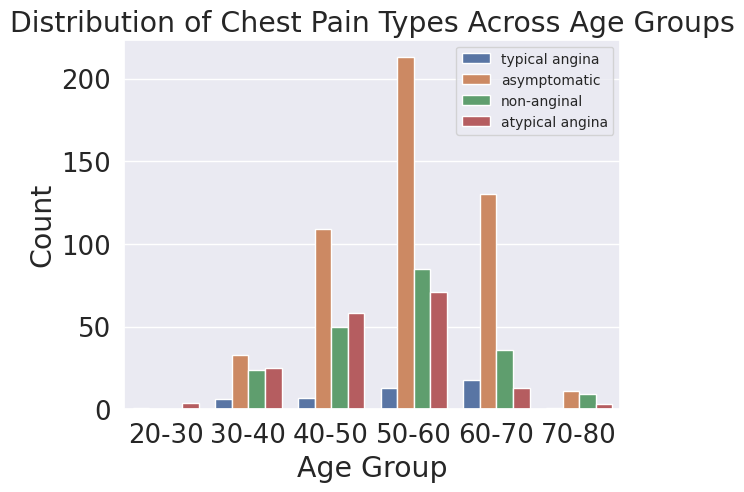

In [242]:
# plot cp based on age groups
df_v['age_group'] = pd.cut(df_v['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
sns.countplot(x='age_group', hue='cp', data=df_v)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types Across Age Groups')
plt.legend(loc='upper right', fontsize='small')  # Add legend in top right and smaller font size

sns.set_palette("icefire")
plt.show()

In [243]:
# show data where thal, ca, slop column are null value

df_null = df[(df['thal'].isnull()) & (df['ca'].isnull())  & (df['slope'].isnull())]
df_null

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
303,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,NaN,NaN,NaN,0
304,29,Male,Hungary,atypical angina,120.0,243.0,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
305,29,Male,Hungary,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
307,31,Female,Hungary,atypical angina,100.0,219.0,False,st-t abnormality,150.0,False,0.0,NaN,NaN,NaN,0
308,32,Female,Hungary,atypical angina,105.0,198.0,False,normal,165.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


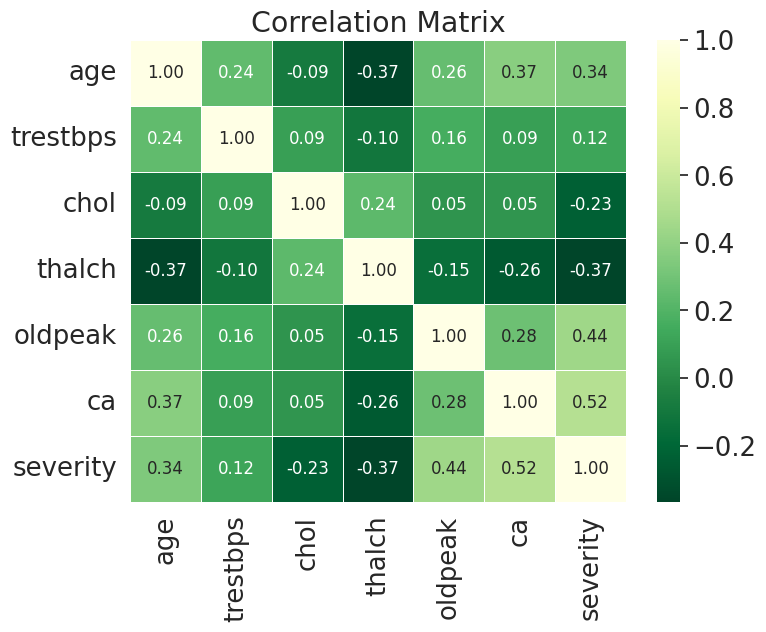

In [244]:
# create a copy of dataframe for early EDA of correlation matrix
df2 = df.copy()
df2_cor = df2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca','severity']]

# show correlation matrix for normalized dataframe
correlation_matrix = df2_cor.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 3. DATA PREPROCESSING

In [245]:
# drop null value that exists in 3 columns

df = df.dropna(subset=['thal', 'ca', 'slope'], how='all')

In [246]:
# defining list of column obtaining null value
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [247]:
# Replace 0 values in 'chol' column with NaN
df['chol'] = df['chol'].replace(0, np.nan)

<ipython-input-247-80ebc9942d56>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [248]:
print(df.isna().sum())

age           0
sex           0
origin        0
cp            0
trestbps      6
chol        168
fbs          84
restecg       1
thalch        3
exang         3
oldpeak       7
slope        52
ca          354
thal        229
severity      0
dtype: int64


In [249]:
# Categorize columns into continuous and categorical
continuous_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
columns_to_encode = ['sex', 'origin', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs']

# Print the column names for each category
print("Continuous columns:", continuous_cols)
print("Categorical columns:", categorical_cols)

num_cols = [col for col in df.select_dtypes(exclude='O')]
cat_cols = [col for col in df.select_dtypes(include='O')]


label_encoders = {}

data = df.copy()

index = {}

for colm in columns_to_encode:
    nan_ixs = np.where(data[colm].isna())[0]
    index[colm] = nan_ixs

df.head()

Continuous columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical columns: ['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [250]:
# Categorized columns for imputation purposes
columns_to_encode = ['sex', 'origin', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs']
num_cols_to_impute =  df.columns[df.isnull().any()].drop(['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']).tolist()
cat_cols_to_impute =  df.columns[df.isnull().any()].drop(['chol', 'thalch', 'trestbps', 'oldpeak']).tolist()
target_column = df.columns[df.notnull().all()].tolist()

print("num_cols_to_impute: ", num_cols_to_impute)
print("cat_cols_to_impute: ", cat_cols_to_impute)
print("target_column: ", columns_to_encode)

label_encoders = {}

for col in columns_to_encode:
    series = df[col]
    label_encoder = LabelEncoder()
    df[col] = pd.Series(
          label_encoder.fit_transform(series[series.notnull()]),
          index=series[series.notnull()].index
      )
    label_encoders[col] = label_encoder

df.sample(6)

<ipython-input-250-51ddf9aaeac9>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-51ddf9aaeac9>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-51ddf9aaeac9>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-

num_cols_to_impute:  ['trestbps', 'chol', 'thalch', 'oldpeak']
cat_cols_to_impute:  ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
target_column:  ['sex', 'origin', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs']


,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
804,65,1,3,0,136.0,248.0,0.0,1.0,140.0,1.0,4.0,0.0,NaN,NaN,4
9,53,1,0,0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,2.0,1
850,48,1,3,2,132.0,220.0,1.0,2.0,162.0,0.0,0.0,NaN,NaN,0.0,1
157,58,1,0,0,125.0,300.0,0.0,0.0,171.0,0.0,0.0,2.0,2.0,2.0,1
521,55,1,1,0,140.0,201.0,0.0,1.0,130.0,1.0,3.0,1.0,NaN,NaN,1
22,58,1,0,1,120.0,284.0,0.0,0.0,160.0,0.0,1.8,1.0,0.0,1.0,1


In [251]:
# defining X and Y for imputing training
X = df.drop(['severity'], axis=1)
y = df['severity']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for optimization
def objective(trial):
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0)
    }

    # Train the model
    model = LGBMClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, preds)
    return 1 - accuracy  # Minimize the error

# Run the optimization
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Best parameters and score
print("Best parameters found: ", study.best_params)
print("Best score found: ", 1 - study.best_value)

[I 2024-11-05 12:04:48,863] A new study created in memory with name: no-name-f026b48d-6946-4e5b-bde6-d39d46b97c25
<ipython-input-251-e5caac237a8e>:21: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-251-e5caac237a8e>:24: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-251-e5caac237a8e>:25: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-11-05 12:04:50,278] Trial 0 finished with value: 0.518796992481203 and parameters: {'num_leaves': 35, 'max_depth': 9, 'learning_rate': 0.21391385838025445, 'n_estimators': 896, 'min_

Best parameters found:  {'num_leaves': 63, 'max_depth': 13, 'learning_rate': 0.16660643465192748, 'n_estimators': 651, 'min_child_samples': 13, 'subsample': 0.7526406023426812, 'colsample_bytree': 0.5393657006998507}
Best score found:  0.5338345864661654


In [252]:
# imputing missing value in numerical column
for col in num_cols_to_impute:

    df_with_missing = df[df[col].isna()]
    # dropna removes all rows with missing values
    df_without_missing = df[df[col].notna()]

    # split the data into X and y and we will only take the columns with no missing values
    X = df_without_missing.drop([col], axis=1)
    y = df_without_missing[col]

    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Random Forest Imputation
    model = LGBMRegressor(num_leaves= 275, max_depth= 3, learning_rate= 0.04421665643928823, n_estimators= 126, min_child_samples= 38, subsample= 0.6401078394320127, colsample_bytree= 0.7021989254468399)

    model.fit(X_train, y_train)

    # evaluate the model
    y_preds = model.predict(X_test)
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    print("MAE for Random Forest Imputation: ", mean_absolute_error(y_test, y_preds))
    print("RMSE for Random Forest Imputation: ", np.sqrt(mean_squared_error(y_test, y_preds)))
    print("R2 Score for Random Forest Imputation: ", r2_score(y_test, y_preds))

    y_pred = np.round(model.predict(df_with_missing.drop([col], axis=1)))

    df_with_missing[col] = y_pred

    df = pd.concat([df_with_missing, df_without_missing], axis=0)


<ipython-input-252-29fc5f00e37c>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-252-29fc5f00e37c>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Missing Values trestbps : 0.9%
MAE for Random Forest Imputation:  14.146877706736136
RMSE for Random Forest Imputation:  18.36819530383222
R2 Score for Random Forest Imputation:  0.022073642556622586
Missing Values chol : 25.34%
MAE for Random Forest Imputation:  41.34924020056133
RMSE for Random Forest Imputation:  58.98864803903131
R2 Score for Random Forest Imputation:  -0.0016332421095615057
Missing Values thalch : 0.45%
MAE for Random Forest Imputation:  15.995982426239296
RMSE for Random Forest Imputation:  19.55291587930714
R2 Score for Random Forest Imputation:  0.3201404940688377
Missing Values oldpeak : 1.06%
MAE for Random Forest Imputation:  0.7613161697999702


<ipython-input-252-29fc5f00e37c>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-252-29fc5f00e37c>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE for Random Forest Imputation:  0.9819466027454727
R2 Score for Random Forest Imputation:  0.3961196890000298


In [253]:
# imputing missing value in categorical column
for col in cat_cols_to_impute:
    df_with_missing = df[df[col].isna()]
    # dropna removes all rows with missing values
    # df_without_missing = df.dropna()
    df_without_missing = df[df[col].notna()]

    # split the data into X and y and we will only take the columns with no missing values
    X = df_without_missing.drop([col], axis=1)
    y = df_without_missing[col]

    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Random Forest Imputation
    rf_model = LGBMClassifier(verbose = -1,learning_rate = 0.023021779601797816, num_leaves = 149, subsample = 0.6929884706542179, colsample_bytree = 0.8635308367372507, min_data_in_leaf = 47, random_state=42)
    rf_model.fit(X_train, y_train)

    # evaluate the model
    y_preds = rf_model.predict(X_test)

    y_pred = rf_model.predict(df_with_missing.drop([col], axis=1))

    acc_score = accuracy_score(y_test, y_preds)

    print("The feature '"+ col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")
    df_with_missing[col] = y_pred

    df = pd.concat([df_with_missing, df_without_missing], axis=0)

The feature 'fbs' has been imputed with 85.34 accuracy



<ipython-input-253-db0d3f0ccdd3>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'restecg' has been imputed with 60.9 accuracy



<ipython-input-253-db0d3f0ccdd3>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-253-db0d3f0ccdd3>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'exang' has been imputed with 78.79 accuracy

The feature 'slope' has been imputed with 62.6 accuracy



<ipython-input-253-db0d3f0ccdd3>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'ca' has been imputed with 58.06 accuracy



<ipython-input-253-db0d3f0ccdd3>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The feature 'thal' has been imputed with 63.22 accuracy



<ipython-input-253-db0d3f0ccdd3>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
print(df.isnull().sum())

age         0
sex         0
origin      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
severity    0
dtype: int64


In [255]:
# making sure the column to encode is in int datatype
for i in columns_to_encode:
    df[i] = df[i].astype(int)

for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]

    # Inverse transform the data
    df[col] = le.inverse_transform(df[col]).astype('O')

# check the 5 samples of row from the complete dataframe
df.sample(10)

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
47,50,Male,Cleveland,asymptomatic,150.0,243.0,False,lv hypertrophy,128.0,False,2.6,flat,0.0,reversable defect,4
6,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
820,68,Male,VA Long Beach,non-anginal,150.0,195.0,True,normal,132.0,False,0.0,flat,0.0,fixed defect,1
739,60,Male,VA Long Beach,asymptomatic,152.0,232.0,False,st-t abnormality,118.0,True,0.0,flat,0.0,reversable defect,0
574,56,Female,Hungary,atypical angina,120.0,279.0,False,normal,150.0,False,1.0,flat,0.0,normal,1
180,48,Male,Cleveland,asymptomatic,124.0,274.0,False,lv hypertrophy,166.0,False,0.5,flat,0.0,reversable defect,3
59,51,Male,Cleveland,typical angina,125.0,213.0,False,lv hypertrophy,125.0,True,1.4,upsloping,1.0,normal,0
745,69,Male,VA Long Beach,asymptomatic,130.0,281.0,True,st-t abnormality,129.0,False,1.0,flat,1.0,fixed defect,2
463,55,Male,Hungary,atypical angina,140.0,196.0,False,normal,150.0,False,0.0,upsloping,0.0,reversable defect,0
134,43,Female,Cleveland,non-anginal,122.0,213.0,False,normal,165.0,False,0.2,flat,0.0,normal,0


In [256]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,severity
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,54.663650,132.600302,250.315234,136.767722,1.115686,0.512821,1.162896
std,8.993787,19.438379,49.840245,25.928505,1.115286,0.827803,1.155838
min,29.000000,0.000000,100.000000,60.000000,-2.600000,0.000000,0.000000
25%,48.000000,120.000000,219.500000,120.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,249.000000,140.000000,1.000000,0.000000,1.000000
75%,61.000000,142.000000,273.000000,156.500000,2.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [257]:
# check rows where trestbps = 0
df[df.trestbps == 0]

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
753,55,Male,VA Long Beach,non-anginal,0.0,214.0,False,normal,155.0,False,1.5,flat,1.0,reversable defect,3


In [258]:
# drop rows where trestbps = 0
df = df[df.trestbps != 0]

Number of outliers detected in age: 0.0%
Number of outliers detected in trestbps: 2.87%
Number of outliers detected in chol: 3.32%
Number of outliers detected in thalch: 0.3%
Number of outliers detected in oldpeak: 0.3%
Number of outliers detected in ca: 3.17%
Number of outliers detected in severity: 0.0%


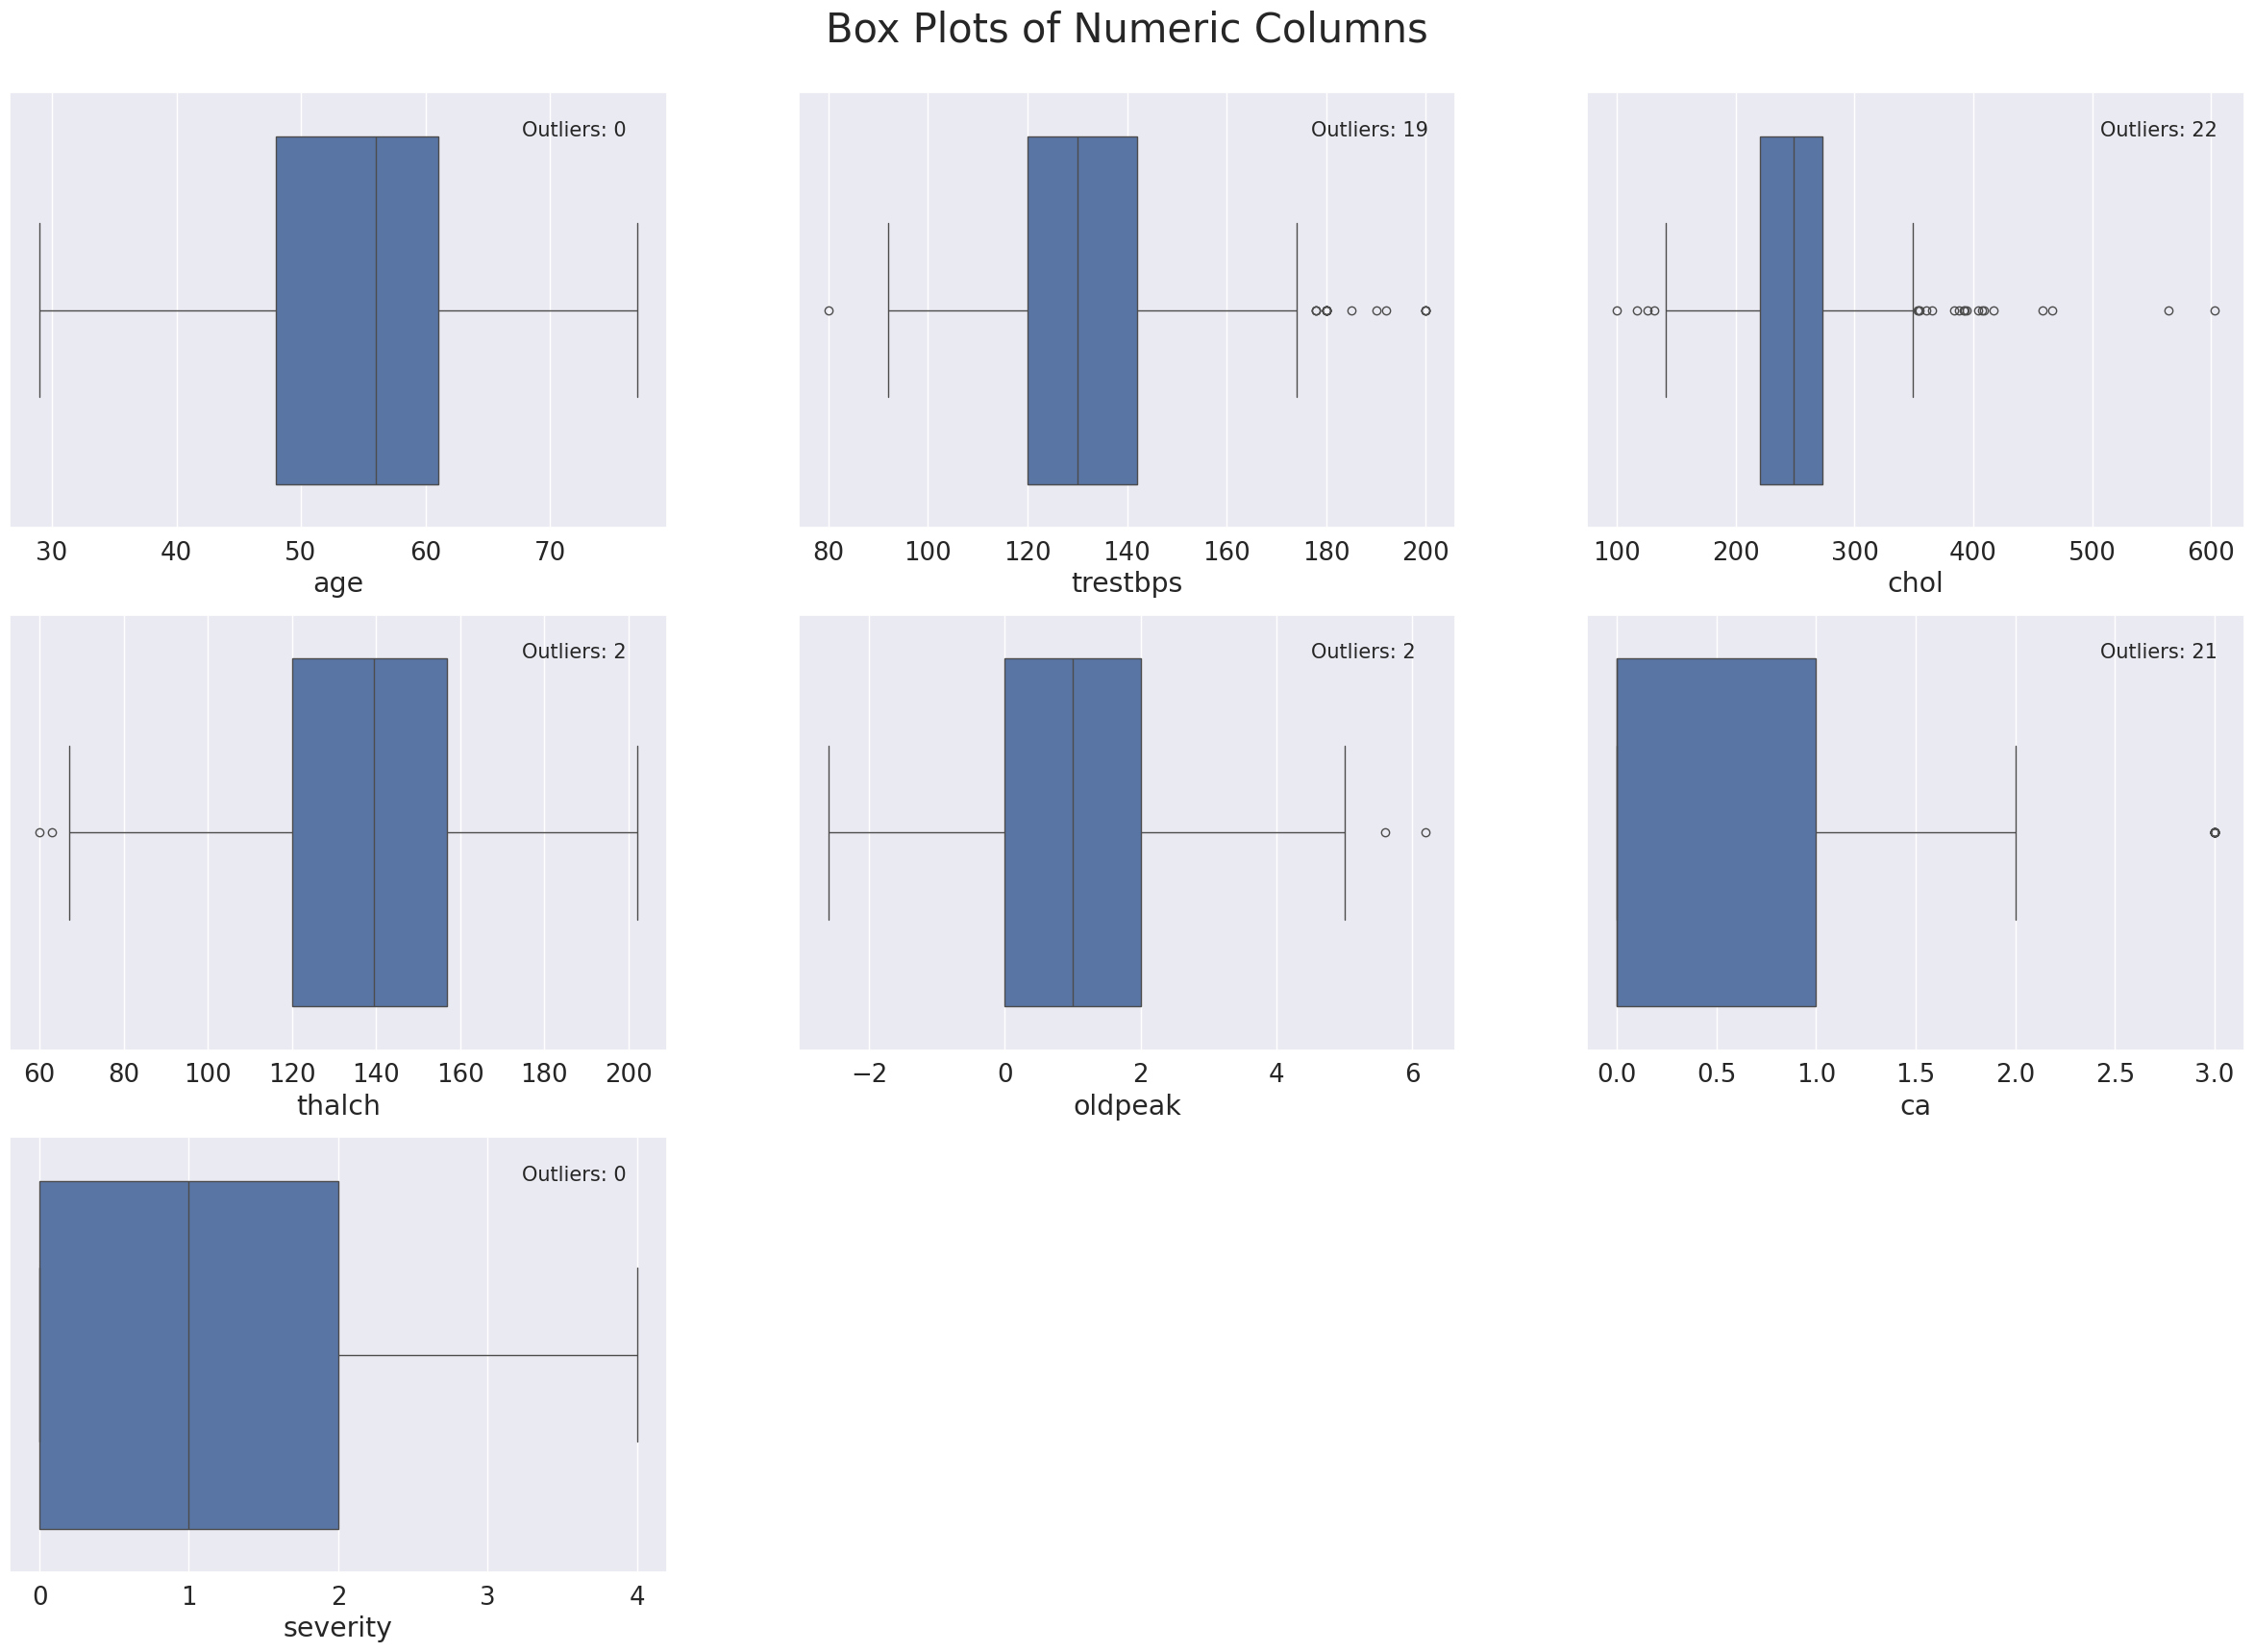

In [259]:
df_num_cols = df[num_cols]

# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(30, 20))
sns.set(font_scale=1.7)
sns.set_style('darkgrid')

outliers_df = pd.DataFrame(columns=['Column', 'Outlier_index', 'Outlier_values'])

for i, col in enumerate(df_num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    outliers_index = df[outliers].index.tolist()
    outliers_values = df[col][outliers].tolist()

    #calculate the percentage of outliers in the dataset
    outliers_percentage = round(len(outliers_values) / df[col].shape[0] * 100, 2)
    print(f"Number of outliers detected in {col}: {outliers_percentage}%")
    outliers_df = pd.concat([outliers_df,pd.DataFrame({'Column': [col],
                                       'Outlier_index': [outliers_index],
                                       'Outlier_values': [outliers_values]})],
                          ignore_index=True)
    outlier_count = outliers.sum()


    plt.text(0.78, 0.9, "Outliers: "+ str(outlier_count),  transform=plt.gca().transAxes, fontsize=15,)

#x and y for set positons
plt.title("Box Plots of Numeric Columns", fontsize=30, y=3.5, x=1.7)
plt.show()

In [260]:
# Check variables skewness
# create a list of features to check
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'severity']

# create an empty DataFrame to store the results
skew_df = pd.DataFrame(columns=['Feature', 'Skewness_type', 'Skewness_value'])

# loop over each feature and calculate its skewness
for feature in features:
    skew = df[feature].skew()

    # determine whether the skewness is positive or negative
    if skew > 0:
        skewness = 'Positively skewed'
    elif skew < 0:
        skewness = 'Negatively skewed'
    else:
        skewness = 'Symmetric'

    skew_df = pd.concat([skew_df,pd.DataFrame({'Feature': [feature],
                                       'Skewness_type': [skewness],
                                       'Skewness_value': [skew]})],
                          ignore_index=True)

# show skewed data of column
skew_df

# skewed_cols = ['oldpeak']

# for c in skewed_cols:
#     sns.histplot(df[c] , kde=True)

<ipython-input-260-1a930f416262>:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Feature,Skewness_type,Skewness_value
0,age,Negatively skewed,-0.232342
1,trestbps,Positively skewed,0.590107
2,chol,Positively skewed,1.362090
3,thalch,Negatively skewed,-0.207863
4,oldpeak,Positively skewed,0.731525
5,ca,Positively skewed,1.451898
6,severity,Positively skewed,0.767272


## **4. EDA**

### **Summary**



1.   Male percentage in the data: 78.7%, and Female Percentage in the data: 21.3%. shows that male has higher probability of getting heart disease.

2.   As people age, they tend to reduce physical activity that also affects level of their maximum heart rate. it shows from scatterplot that there is low negative corellation of lower maximum heart rate is associated with higher level of heart disease.

3.   The increasing risk of number of major vessels problem will rise as the person get older especially when it hits above 50 years old. Therefore, number of bad condition artery is the main correlation of getting more severe heart diseases. also severe condition of CAD condition triggers angina chest pain that correlates to higher chance of heart diseases.

4.   The interesting part is the most cases of heart diseases is the patient having asymptomatic or no signs of chest pain occured.





In [293]:
# prompt: show pie chart based on sex column
sex_counts = df['sex'].value_counts()

fig = px.pie(values=sex_counts.values, names=sex_counts.index,
             title='Distribution of Sex', color_discrete_sequence=px.colors.qualitative.Pastel1)


fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    legend_title_text='sex',
    xaxis_title='Outcome',
    title={
        'text': "Percentage Distribution of Sex",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=24)})


fig.show()

In [291]:
severity_counts = df_v['severity'].value_counts()

fig = px.pie(values=severity_counts.values, names=severity_counts.index,
             title='Distribution of heart diseases severity', color_discrete_sequence=px.colors.sequential.OrRd, hole=0.5)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    legend_title_text='severity',
    xaxis_title='Outcome',
    title={
        'text': "Percentage Distribution of heart diseases severity",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=24)})

fig.show()

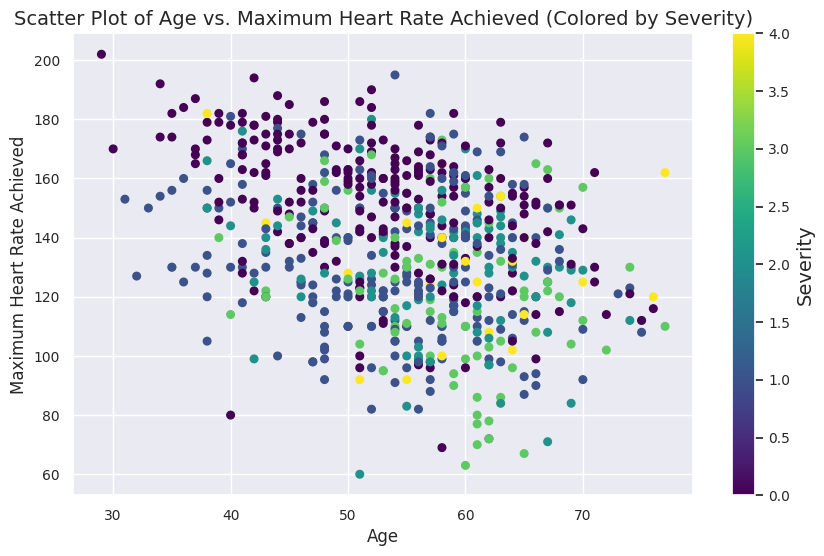

In [262]:
# scatter plot age to thalch where the color is severity smaller font

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['thalch'], c=df['severity'], cmap='viridis', s=30)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Maximum Heart Rate Achieved', fontsize=12)
plt.title('Scatter Plot of Age vs. Maximum Heart Rate Achieved (Colored by Severity)', fontsize=14)
cbar = plt.colorbar(label='Severity')
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Severity', fontsize=14)
plt.tick_params(labelsize=10)
plt.show()

<ipython-input-263-1bc3a1eeec9c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




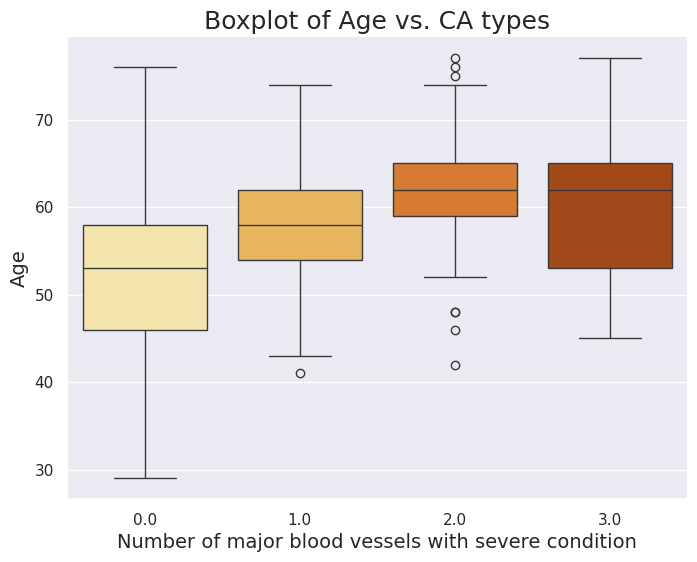

In [263]:
# Boxplot of Ca types to age

plt.figure(figsize=(8, 6), facecolor='white')
plt.rcParams.update({'font.size': 12})

sns.boxplot(x='ca', y='age', data=df, palette='YlOrBr')
plt.xlabel('Number of major blood vessels with severe condition', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.title('Boxplot of Age vs. CA types', fontsize=18)

sns.despine()

plt.show()

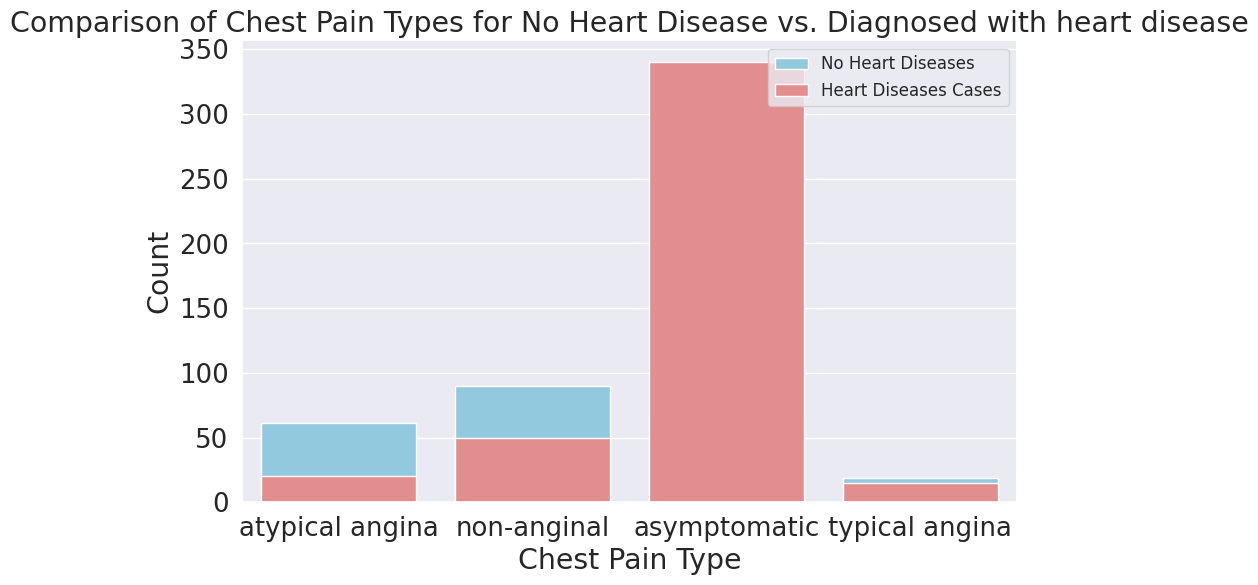

In [264]:
# plot cp types who has severity of 1 to 4 compared to 0

plt.figure(figsize=(10, 6))

# Filter data for severity 0
df_severity_0 = df[df['severity'] == 0]
# Filter data for severity 1 to 4
df_severity_1_4 = df[df['severity'].between(1, 4)]


sns.countplot(x='cp', data=df_severity_0, color='skyblue', label='No Heart Diseases')
sns.countplot(x='cp', data=df_severity_1_4, color='lightcoral', label='Heart Diseases Cases')


plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Comparison of Chest Pain Types for No Heart Disease vs. Diagnosed with heart disease')
plt.legend(loc='upper right', fontsize='medium')

plt.show()

<ipython-input-265-2bdf0d2e6c31>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-265-2bdf0d2e6c31>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-265-2bdf0d2e6c31>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-265-2bdf0d2e6c31>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-265-2bdf0d2e6c31>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

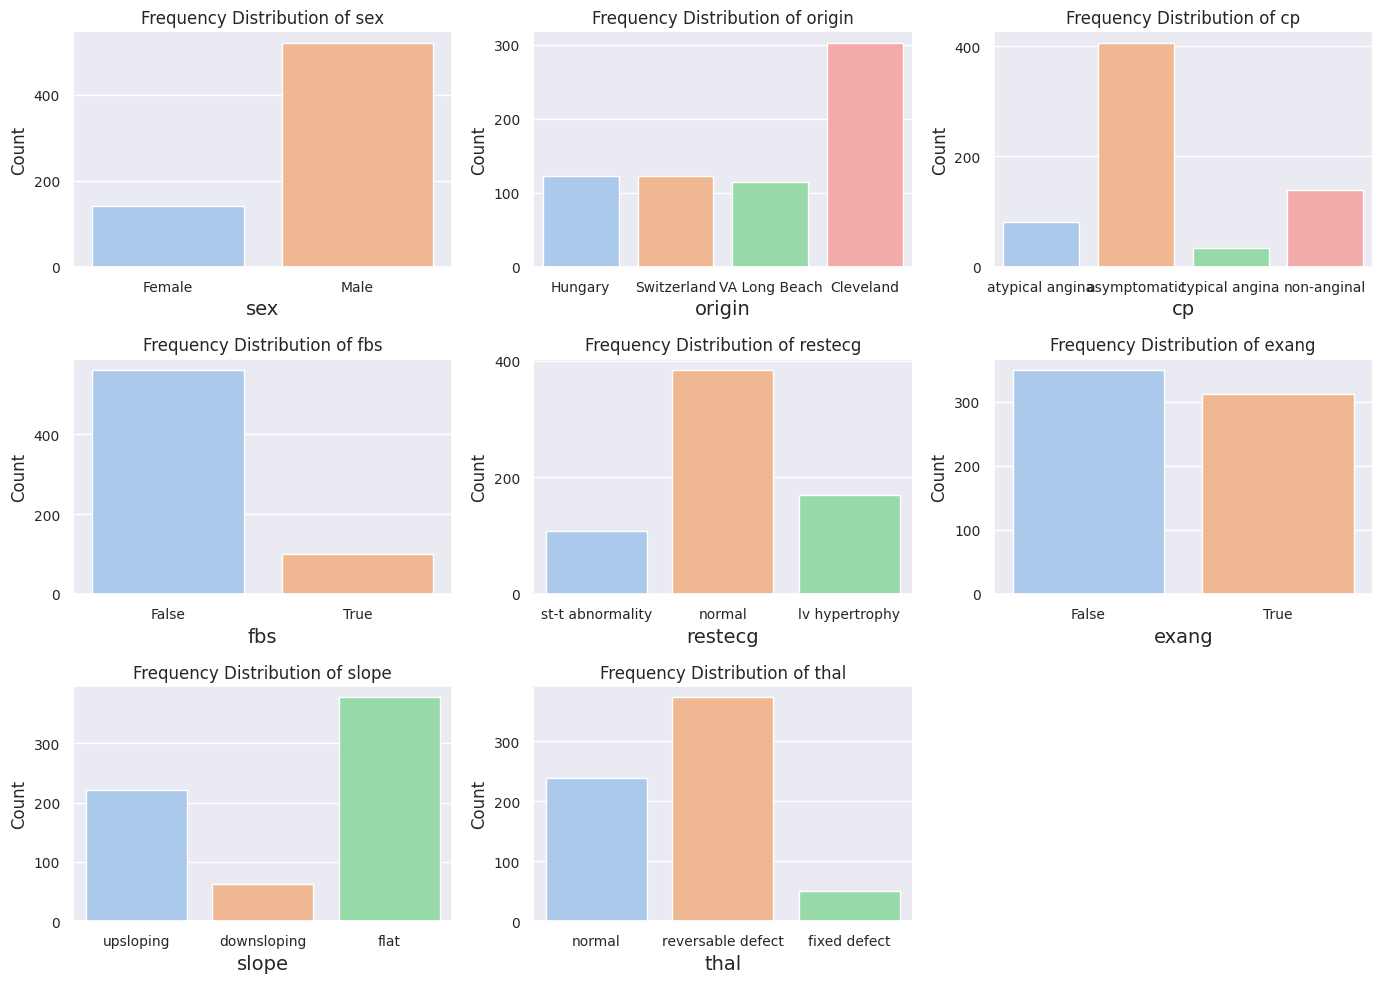

In [265]:
# show series of categorical column barplot

plt.figure(figsize=(14, 10))
for i, var in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette='pastel', legend=False)  # Use 'Set2' palette for different colors
    plt.title(f'Frequency Distribution of {var}', fontsize=12)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

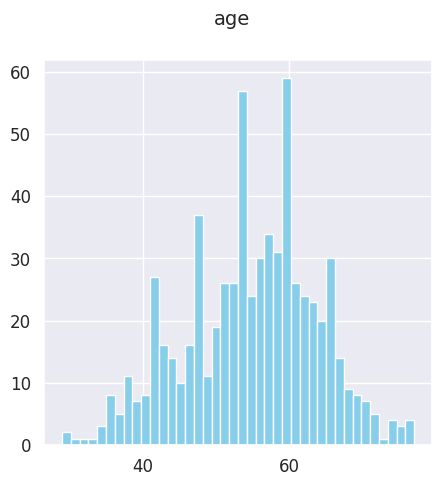

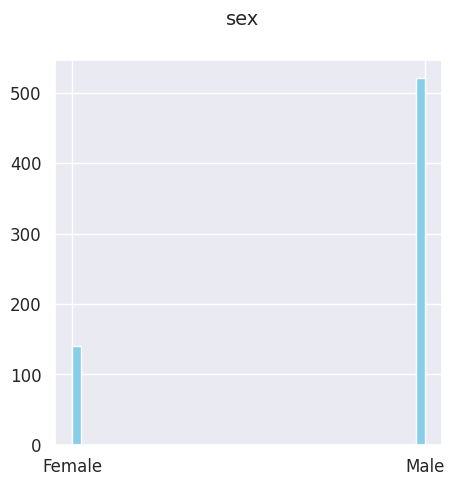

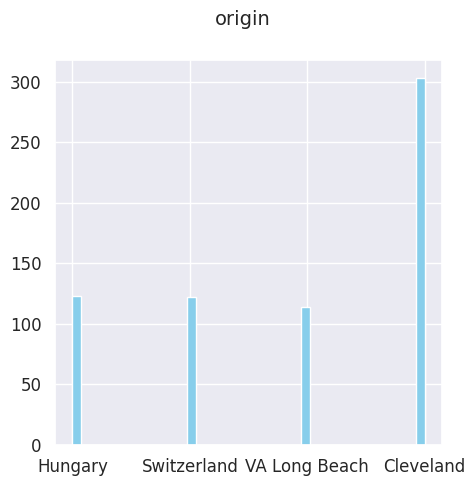

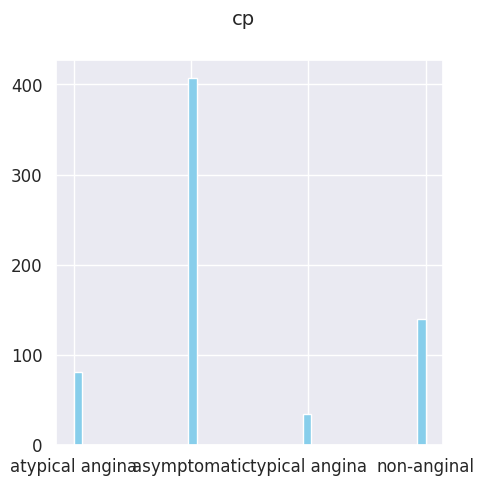

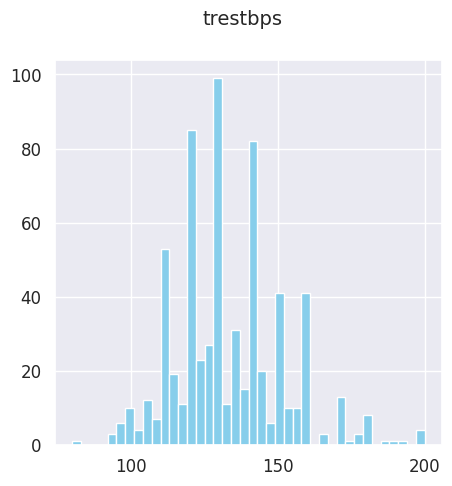

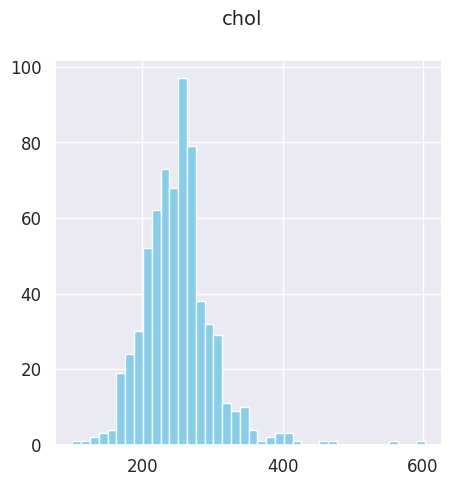

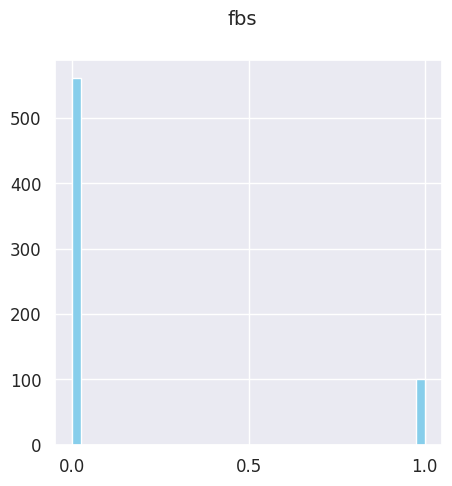

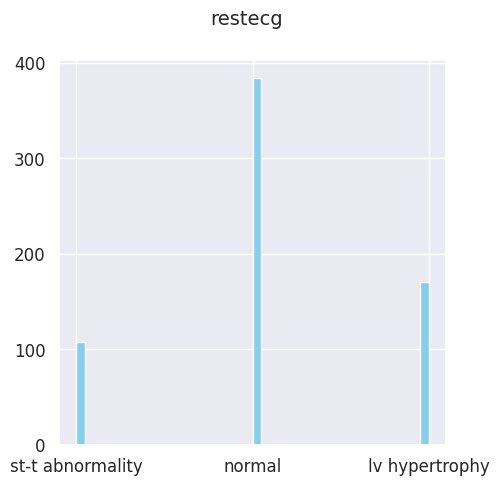

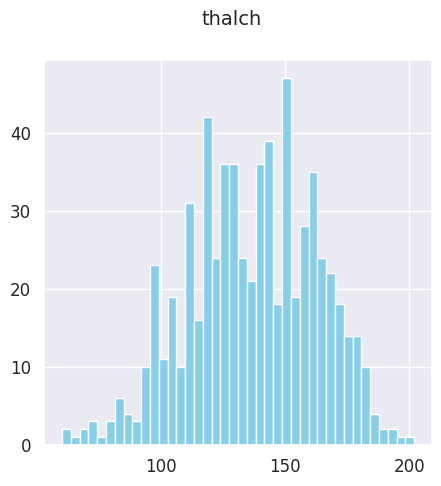

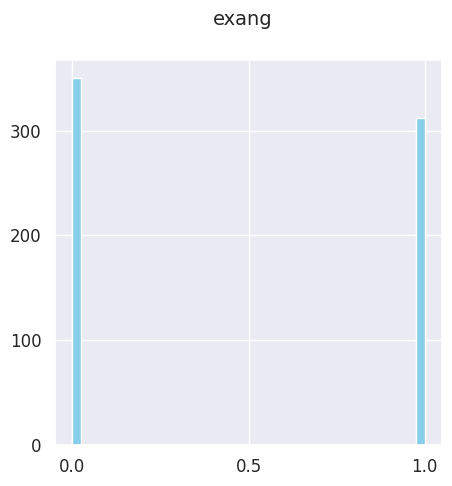

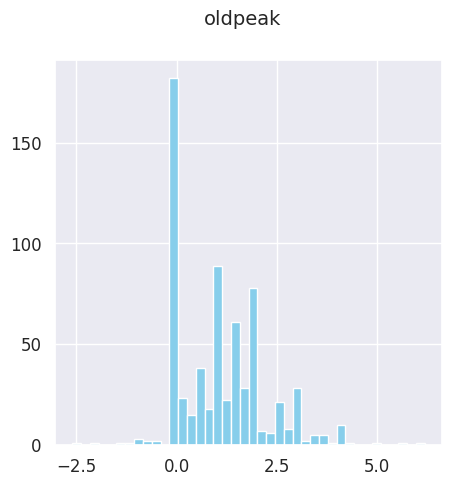

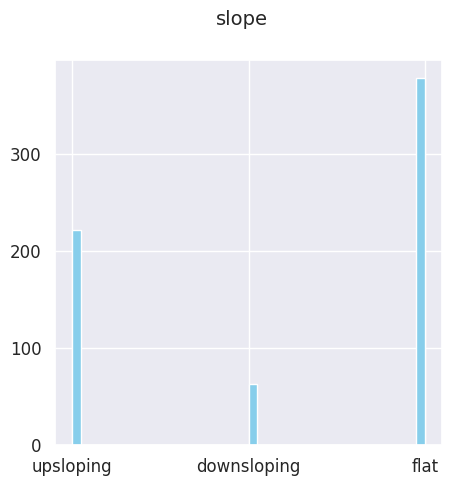

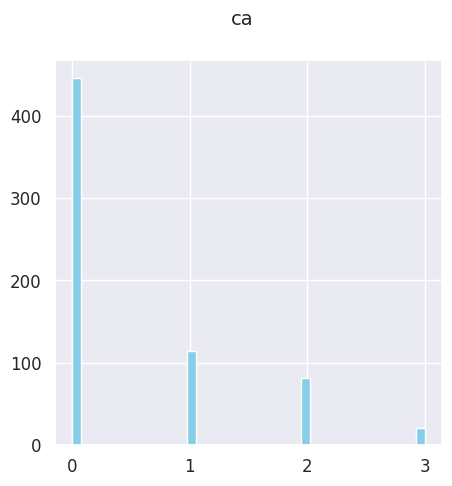

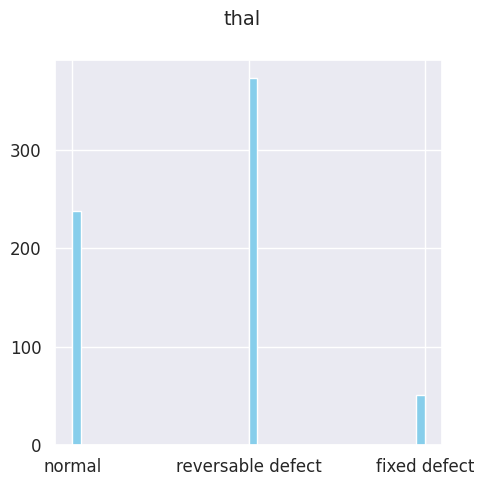

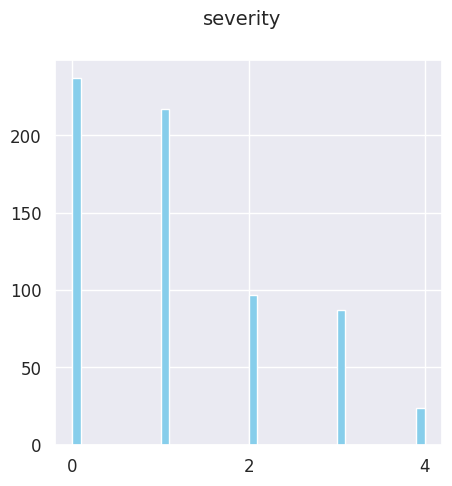

In [266]:
# prompt: convert fbs column boolean value to 0 and 1 in order to make histogram visualization
df_t = df.copy()

df_t['fbs'] = df_t['fbs'].astype(bool)
df_t['fbs'] = df_t['fbs'].astype(int)

df_t['exang'] = df_t['exang'].astype(bool)
df_t['exang'] = df_t['exang'].astype(int)

df_t['thal'] = df_t['thal'].astype(str)

# presenting all features in dataset in form of histogram
for i in df_t:
    df_t[i].hist(bins=40, figsize=(5,5), color='skyblue')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.suptitle(i, fontsize=14)
    plt.show()

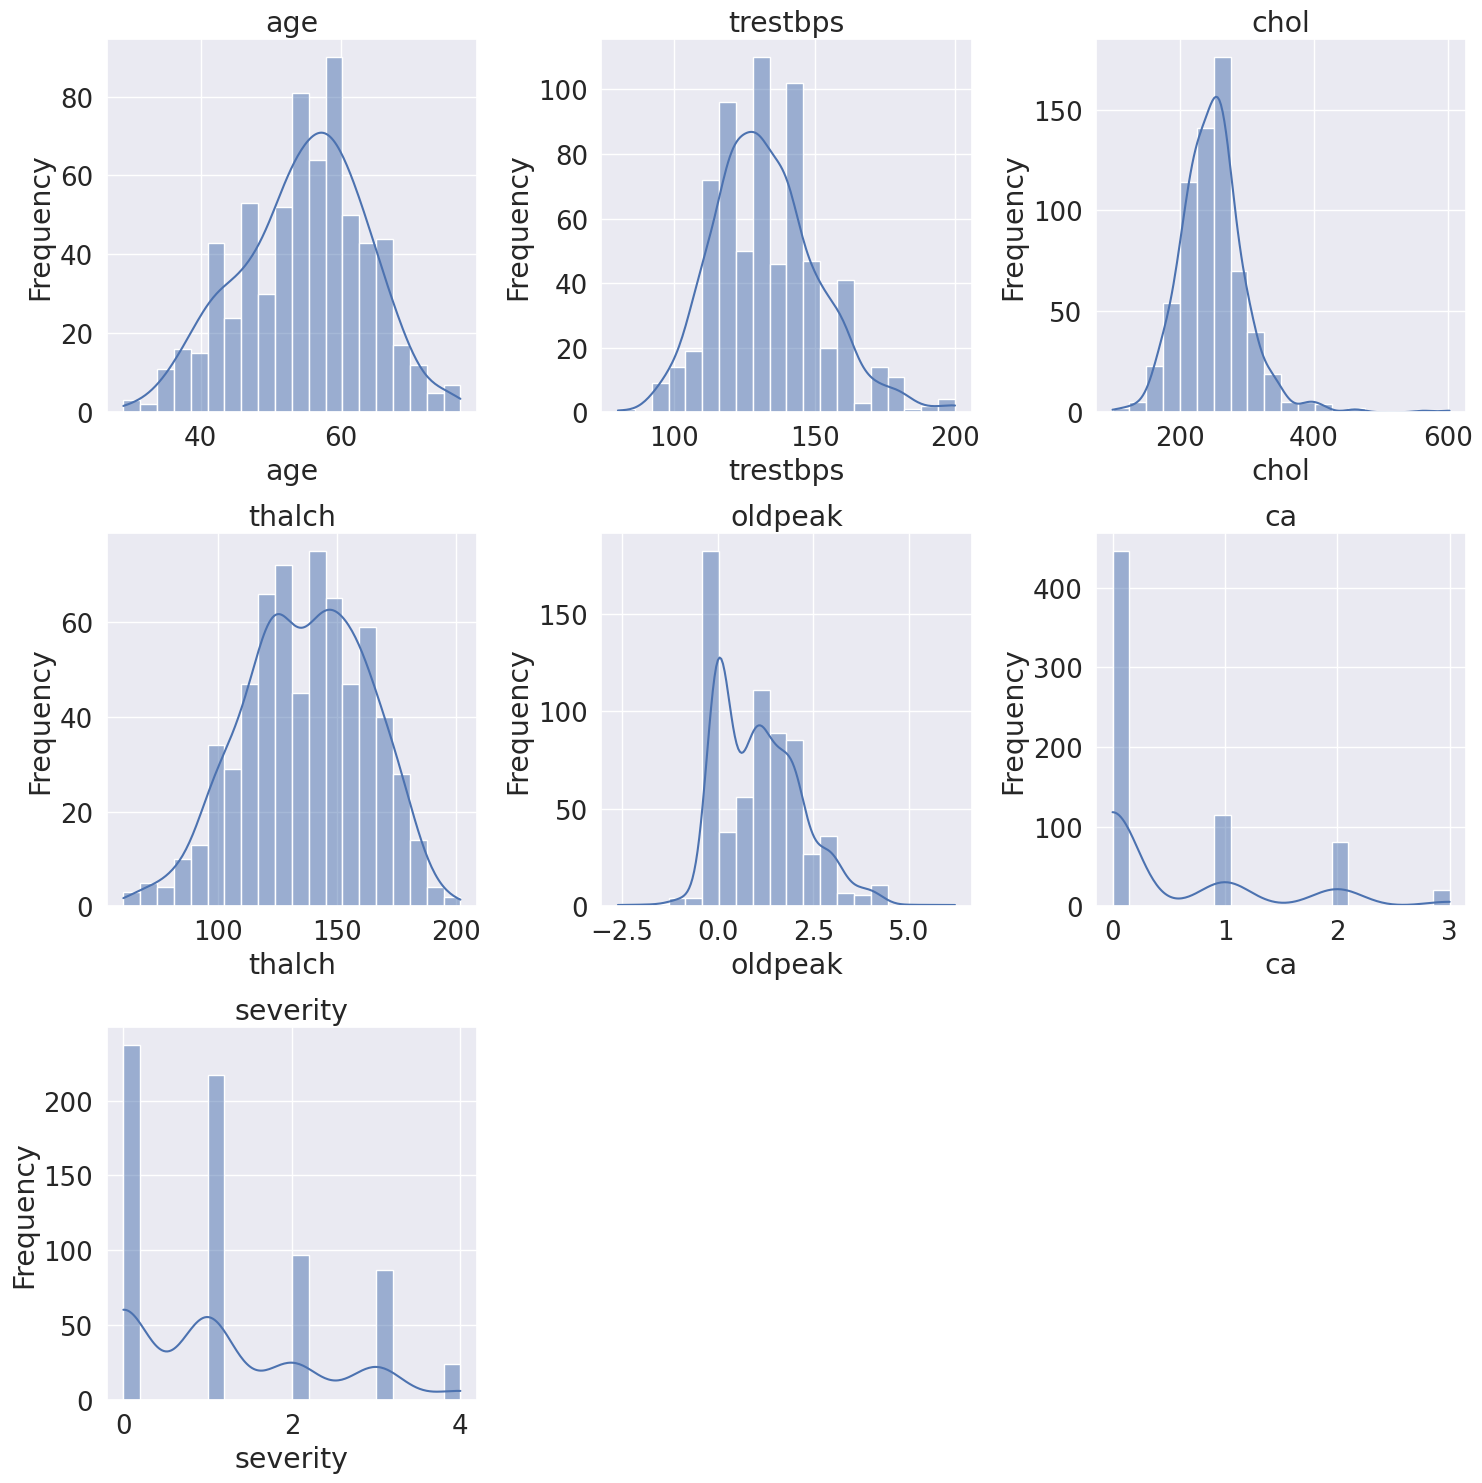

In [287]:
# subplot all the numeric columns

df_num = df.select_dtypes(include=np.number)

# Calculate the number of rows and columns for subplots
num_cols = len(df_num.columns)
num_rows = (num_cols + 2) // 3  # Ensure enough rows for all plots

# Create subplots
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df_num.columns):
  plt.subplot(num_rows, 3, i + 1)
  sns.histplot(df_num[col], bins=20, kde=True)
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

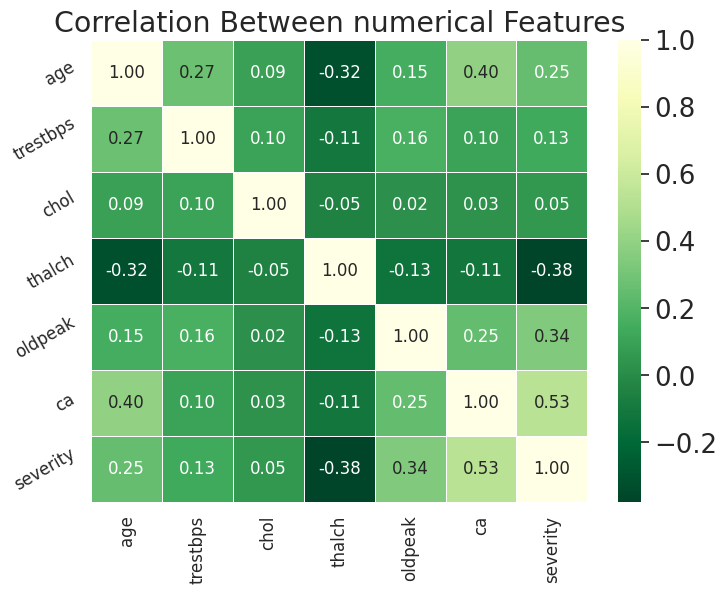

In [268]:
# Correlation between the features
fig=plt.gcf()
fig.set_size_inches(8, 6)
plt.title('Correlation Between numerical Features')
a = sns.heatmap(df_num_cols.corr(), annot = True, cmap='YlGn_r', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
a.set_xticklabels(a.get_xticklabels(), rotation=90,fontsize=12)
a.set_yticklabels(a.get_yticklabels(), rotation=30,fontsize=12)
plt.show()

## **5. MODEL**

In [269]:
#Encode back catergorical data to numeric for training purposes
columns_to_encode = ['sex', 'origin', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs']

label_encoders = {}

for col in columns_to_encode:
    series = df[col]
    label_encoder = LabelEncoder()
    df[col] = pd.Series(
          label_encoder.fit_transform(series[series.notnull()]),
          index=series[series.notnull()].index
      )
    label_encoders[col] = label_encoder

df.sample(6)

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
524,59,0,1,0,130.0,338.0,1,2,130.0,1,1.5,1,0.0,2,1
761,40,1,3,0,125.0,257.0,1,1,165.0,0,0.0,2,0.0,2,1
196,69,1,0,3,160.0,234.0,1,0,131.0,0,0.1,1,1.0,1,0
264,61,1,0,0,138.0,166.0,0,0,125.0,1,3.6,1,1.0,1,4
716,70,1,2,0,140.0,282.0,1,1,157.0,1,2.0,1,2.0,2,3
724,66,1,3,2,110.0,213.0,1,0,99.0,1,1.3,1,0.0,2,0


In [270]:
# defining features and target data
X = df.drop(['severity'], axis=1)
y = df['severity']

y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

# splitting data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Hyperparameter tuning**

In [271]:
# dictionary filled with training models and hyperparameter
models = {

  'Logistic Regression': (LogisticRegression(),
    {
        'C': [1, 10],
        'penalty': ['l2'],
        'max_iter': [1000],
    }),

  'Support Vector Machine': (SVC(),
    {
        'C': [1, 10],
        'kernel': ['rbf'],
    }),

  'XGBoost Classifier': (XGBClassifier(),
    {
        'max_depth': [3, 4],
        'learning_rate': [0.1, 0.2],
        'n_estimators': [50, 100],
        'gamma': [0, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0],
        'reg_lambda': [1],
    }),

  'Decision Tree Classifier': (DecisionTreeClassifier(),
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 10],
        'max_features': [None, 'sqrt', 'log2']
    }),

'Random Forest Classifier': (RandomForestClassifier(),
    {
        'n_estimators': [10, 50],
        'max_depth': [None, 3, 5],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2],
    }),

  'K-Nearest Neighbors': (KNeighborsClassifier(),
    {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),

'Gradient Boosting Classifier': (GradientBoostingClassifier(),
    {
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 4],
        'max_features': ['sqrt', 'log2', None]
    }),

    'LGBM Classifier': (LGBMClassifier(),
        {
            'n_estimators': [10, 100],
            'max_depth': [None, 1, 2, 3],
            'learning_rate': [0.1, 0.2, 0.3],
            'verbose': [-1]
        }),

    'GaussianNB': (GaussianNB(),
        {}),

    'RidgeClassifier': (RidgeClassifier(),
              {
                  'alpha' :[0.1,0.2,0.3,0.5,0.8,0.9,1.0,0.01,0.02]
              }
             ),


}

In [272]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

model_scores = []
best_accuracy = 0
best_estimator = None

In [273]:
for name, (model, param_grid) in models.items():
    feature_selection = SelectKBest(mutual_info_classif, k=10)

    grid_search = GridSearchCV(
        model,
        param_grid,
        cv = 5,
        scoring ='accuracy',
        verbose = 0,
        n_jobs = -1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store performance metrics for the current model
    model_scores.append({
        'Model': name,
        "Cross-validation Accuracy" : grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_estimator = grid_search.best_estimator_
        best_param = grid_search.best_params_

sorted_models = sorted(model_scores, key=lambda x: x['Accuracy'], reverse=True)
metrics = pd.DataFrame(sorted_models)
metrics

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Model,Cross-validation Accuracy,Accuracy,Precision,Recall,F1 Score
0,LGBM Classifier,0.871500,0.827068,0.823511,0.827068,0.822643
1,XGBoost Classifier,0.882785,0.819549,0.815621,0.819549,0.814134
2,Gradient Boosting Classifier,0.873351,0.819549,0.816382,0.819549,0.812426
3,Random Forest Classifier,0.875238,0.804511,0.799478,0.804511,0.798646
4,GaussianNB,0.839317,0.789474,0.795516,0.789474,0.791760
5,RidgeClassifier,0.850674,0.781955,0.776810,0.781955,0.778172
6,Logistic Regression,0.856316,0.774436,0.768264,0.774436,0.769616
7,K-Nearest Neighbors,0.699425,0.744361,0.732355,0.744361,0.728731
8,Decision Tree Classifier,0.826146,0.729323,0.745001,0.729323,0.734547
9,Support Vector Machine,0.735436,0.721805,0.704897,0.721805,0.699537


In [274]:
best_param

{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 100, 'verbose': -1}

### **Model Evaluation**

In [275]:
model = LGBMClassifier(learning_rate= 0.3, max_depth= 1, n_estimators= 100)
# model = XGBClassifier(colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.1, max_depth= 4, n_estimators= 50, reg_alpha= 0, reg_lambda= 1, subsample= 0.8)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71        43
           1       0.85      0.91      0.88        90

    accuracy                           0.83       133
   macro avg       0.81      0.78      0.79       133
weighted avg       0.82      0.83      0.82       133



In [276]:
print(f"Training set score: {model.score(X_train, y_train):.2f}")
print(f"Test set score: {model.score(X_test, y_test):.2f}")

Training set score: 0.90
Test set score: 0.83


In [277]:
#save model
import pickle

pickle.dump(model, open('best_model', 'wb'))

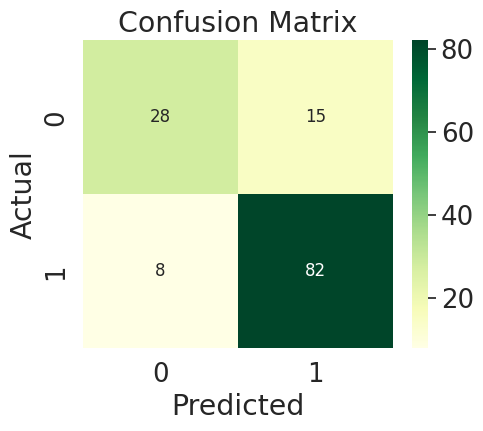

In [278]:
# show visual representation of new confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [279]:
# Re-encode data back to categorical using inverse_transform

# making sure the column to encode is in int datatype
for i in columns_to_encode:
    df[i] = df[i].astype(int)

for colm in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[colm]

    # Inverse transform the data
    df[colm] = le.inverse_transform(df[colm]).astype('O')

# check the 5 samples of row from the complete dataframe
df.sample(5)

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,severity
163,58,Female,Cleveland,asymptomatic,100.0,248.0,False,lv hypertrophy,122.0,False,1.0,flat,0.0,normal,0
653,56,Male,Switzerland,non-anginal,125.0,233.0,False,normal,98.0,False,-2.0,flat,1.0,reversable defect,2
754,52,Male,VA Long Beach,non-anginal,122.0,218.0,False,normal,110.0,True,2.0,downsloping,1.0,reversable defect,2
185,63,Female,Cleveland,atypical angina,140.0,195.0,False,normal,179.0,False,0.0,upsloping,2.0,normal,0
565,52,Male,Hungary,asymptomatic,130.0,298.0,False,normal,110.0,True,1.0,flat,0.0,reversable defect,1
